In [2]:
# Lab 10 MNIST and softmax
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(111) #13549841164987413419816313218511694161
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

C:\Users\gicht\anaconda3\envs\deep_class\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

tensor(0)


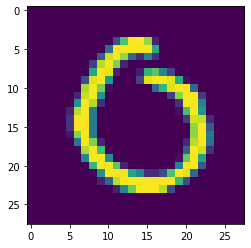

In [7]:
data_show = iter(data_loader)
image,label = data_show.next()
plt.imshow(image[0].reshape(28,28,1))
print(label[0])

In [8]:
# nn layers
linear1 = torch.nn.Linear(28*28, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [9]:
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-1.0664, -0.5341,  0.5416,  ..., -0.3494, -0.7993, -1.3630],
        [-0.8288,  0.3015, -0.2168,  ...,  0.5709, -1.9509,  0.6723],
        [ 1.1756,  0.1627, -1.7456,  ...,  0.0268,  1.1016,  0.1390],
        ...,
        [-0.2721,  0.2482, -0.5388,  ...,  0.2252,  0.0551, -0.4363],
        [ 0.7825,  2.1969,  0.1707,  ..., -0.9033,  1.3682,  0.4740],
        [-0.2499,  1.1086,  1.2230,  ...,  1.0903, -1.3608,  0.8603]],
       requires_grad=True)

In [10]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [11]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.reshape(-1, 28 * 28).to(device) # flatten 1x784
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 137.362792969
Epoch: 0002 cost = 36.009704590
Epoch: 0003 cost = 22.322553635
Epoch: 0004 cost = 15.348307610
Epoch: 0005 cost = 11.172143936
Epoch: 0006 cost = 8.242192268
Epoch: 0007 cost = 6.120537281
Epoch: 0008 cost = 4.657973289
Epoch: 0009 cost = 3.482614279
Epoch: 0010 cost = 2.516423702
Epoch: 0011 cost = 1.956021428
Epoch: 0012 cost = 1.555334091
Epoch: 0013 cost = 1.143581033
Epoch: 0014 cost = 0.959981918
Epoch: 0015 cost = 0.787052989
Learning finished


In [13]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.reshape(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    print(correct_prediction)
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

tensor([True, True, True,  ..., True, True, True])
Accuracy: 0.9440000057220459
Label:  9
Prediction:  9


C:\Users\gicht\anaconda3\envs\deep_class\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\gicht\anaconda3\envs\deep_class\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
